In [10]:
from timepix_geometry_correction.correct import TimepixGeometryCorrection
import os

from matplotlib import pyplot as plt

In [6]:
data = "data/siemens_star.tif"
assert os.path.exists(data)

In [9]:
o_corrector = TimepixGeometryCorrection(images_path=[data])
corrected = o_corrector.correct(display=False)


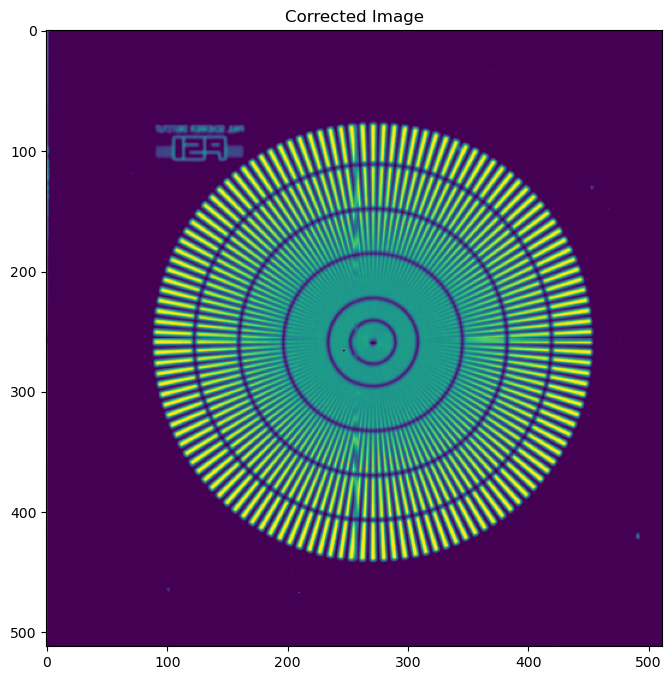

In [13]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(corrected[0], vmin=0.55, vmax=0.95, cmap='viridis')
ax.set_title("Corrected Image")
plt.show()